# Workflows de Análise de Dados e Geoestatística

## Módulo 2 - Análise Exploratória de Dados com Python

### Imports

In [1]:
# imports

import os

import pandas as pd

# data viz
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# configuring plots of seaborn
sns.set_style("white", {'axes.grid':False}, )

### Helper functions

In [3]:
# directories
def get_directories():
    # getting working paths
    CURRENT_DIR = os.path.dirname(os.path.realpath('__file__'))
    PARENT_DIR = os.path.dirname(CURRENT_DIR)
    #QUERY_DIR = os.path.join(CURRENT_DIR, 'queries')
    DATA_DIR = os.path.join(PARENT_DIR, 'data')
    
    dirs = {
        "CURRENT_DIR" : CURRENT_DIR,
        "PARENT_DIR" : PARENT_DIR,
        #"QUERY_DIR" : QUERY_DIR,
        "DATA_DIR" : DATA_DIR
    }

    return (dirs)


# metadados sobre dataframe
def meta_df(df):
    return pd.DataFrame({'dtypes': df.dtypes,
                         'nmissing': df.isna().sum(),
                         'missing%': round(df.isna().sum()/df.shape[0]*100, 2),
                         'nunique': df.nunique(),
                         'nunique%': round(df.nunique()/df.shape[0]*100, 2),
                         'size': df.shape[0]}, index = df.columns)

In [4]:
get_directories()

{'CURRENT_DIR': 'C:\\Users\\lucas\\Documents\\code\\workflows-geoestatistica-data\\modulo_2',
 'PARENT_DIR': 'C:\\Users\\lucas\\Documents\\code\\workflows-geoestatistica-data',
 'DATA_DIR': 'C:\\Users\\lucas\\Documents\\code\\workflows-geoestatistica-data\\data'}

In [5]:
# importing data

data_dir = get_directories()["DATA_DIR"]
df_jura = pd.read_csv(os.path.join(data_dir,"silver_jura.csv"))
df_jura.head(10)

,vlLocX,vlLocY,descLanduse,descUnit,vlCadmium,vlCobalt,vlChromium,vlNickel,vlLead,vlZinc,status,rankCadmium,rankCobalt,rankChromium,rankNickel,rankPb,rankZn,descAnomalyZn
0,1.932,1.004,campo,argoviano,0.135,4.520,15.08,5.24,37.00,32.56,NaN,0.00,0.14,0.02,0.03,0.28,0.04,normal
1,1.824,0.999,campo,argoviano,0.165,3.752,18.60,7.08,56.40,44.00,NaN,0.00,0.07,0.06,0.07,0.68,0.12,normal
2,1.883,1.176,campo,argoviano,0.195,3.920,21.80,7.52,49.60,43.20,NaN,0.01,0.10,0.12,0.10,0.56,0.10,normal
3,1.837,1.037,campo,argoviano,0.215,3.880,23.00,8.16,46.80,44.00,NaN,0.01,0.09,0.14,0.11,0.51,0.12,normal
4,3.768,2.775,floresta,kimmeridgiano,0.220,10.800,26.32,17.52,31.88,45.20,NaN,0.02,0.60,0.20,0.37,0.11,0.14,normal
5,1.839,0.995,campo,argoviano,0.225,4.240,24.88,10.12,55.60,56.00,NaN,0.02,0.12,0.17,0.16,0.68,0.26,normal
6,2.537,3.768,campo,argoviano,0.230,3.792,18.20,5.68,26.84,32.08,NaN,0.02,0.08,0.04,0.05,0.04,0.03,normal
7,2.502,3.988,campo,argoviano,0.240,3.760,18.92,5.20,22.36,32.24,NaN,0.03,0.08,0.06,0.03,0.02,0.04,normal
8,1.842,0.989,campo,argoviano,0.240,4.520,27.96,11.32,52.40,56.40,NaN,0.03,0.14,0.26,0.20,0.62,0.26,normal
9,1.897,1.220,campo,argoviano,0.260,3.480,16.24,4.76,27.00,27.20,NaN,0.04,0.04,0.03,0.01,0.05,0.01,normal


In [6]:
meta_df(df_jura)

,dtypes,nmissing,missing%,nunique,nunique%,size
vlLocX,float64,0,0.00,238,94.82,251
vlLocY,float64,0,0.00,241,96.02,251
descLanduse,object,0,0.00,4,1.59,251
descUnit,object,0,0.00,5,1.99,251
vlCadmium,float64,0,0.00,209,83.27,251
vlCobalt,float64,0,0.00,172,68.53,251
vlChromium,float64,0,0.00,198,78.88,251
vlNickel,float64,0,0.00,213,84.86,251
vlLead,float64,0,0.00,192,76.49,251
vlZinc,float64,0,0.00,183,72.91,251


In [7]:
df_jura.columns

Index(['vlLocX', 'vlLocY', 'descLanduse', 'descUnit', 'vlCadmium', 'vlCobalt',
       'vlChromium', 'vlNickel', 'vlLead', 'vlZinc', 'status', 'rankCadmium',
       'rankCobalt', 'rankChromium', 'rankNickel', 'rankPb', 'rankZn',
       'descAnomalyZn'],
      dtype='object')

In [8]:
grade_features = ["vlCadmium", "vlCobalt", "vlChromium", "vlNickel", "vlLead", "vlZinc", "descUnit"]
grade_features

['vlCadmium',
 'vlCobalt',
 'vlChromium',
 'vlNickel',
 'vlLead',
 'vlZinc',
 'descUnit']

### Visualizing Data

In [9]:
fig = px.scatter(
    x=df_jura["vlCadmium"],
    y=df_jura["vlZinc"], 
    color=df_jura['descUnit'],
    title="Scatter Cd X Zn"
  )

fig.update_layout(width=800, height=500, title_x=0.5,template="simple_white",font_family="Calibri", margin=dict(r=20,b=20)
)
fig.update_xaxes(showline=True,linewidth=0.5,linecolor='black',title_text='x',ticks="inside",tickwidth=0.5)
fig.update_yaxes(showline=True,linewidth=0.5,linecolor='black',title_text='y',ticks="inside",tickwidth=0.5)
fig.show()

#### Creating linear models

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np
import plotly.graph_objects as go

In [81]:
def plot_linear_model_pair (df, x_elem, y_elem):

  # objeto Regressor
  reg = LinearRegression()

  xm = df[x_elem].values[:,np.newaxis]
  xm_plot = [a[0] for a in xm]
  ym = df[y_elem].values

  # fit and predict
  reg.fit(X=xm, y=ym)
  line = reg.predict(xm)

  # plotting
  plt.figure(figsize=(12,8))
  sns.scatterplot(x=xm_plot, y=ym[:])
  
  print(line)
  sns.lineplot(x=xm_plot, y=line)
  plt.show()

  return reg.get_params()

[ 50.27320886  50.90098655  51.52876425  51.94728272  52.05191233
  52.15654195  52.26117156  52.4704308   52.4704308   52.88894926
  53.20283811  53.20283811  53.30746773  53.41209734  53.72598619
  53.83061581  54.14450466  54.14450466  54.24913427  54.24913427
  54.77228235  54.91876382  54.98154159  55.19080082  55.29543043
  55.81857852  55.81857852  56.3417266   56.3417266   56.65561544
  56.86487468  56.96950429  57.17876353  57.59728199  57.70191161
  57.80654122  58.01580046  58.22505969  58.22505969  58.43431892
  58.43431892  58.64357815  58.74820777  58.957467    58.99931885
  59.06209662  59.16672623  59.16672623  59.16672623  59.37598547
  59.48061508  59.5852447   59.68987431  60.10839278  60.10839278
  60.2130224   60.42228163  60.42228163  60.52691124  60.52691124
  60.52691124  60.63154086  60.63154086  60.94542971  61.05005932
  61.15468894  61.78246664  61.78246664  61.88709625  61.88709625
  62.2009851   62.2009851   62.51487395  62.61950357  62.78691095
  62.82876

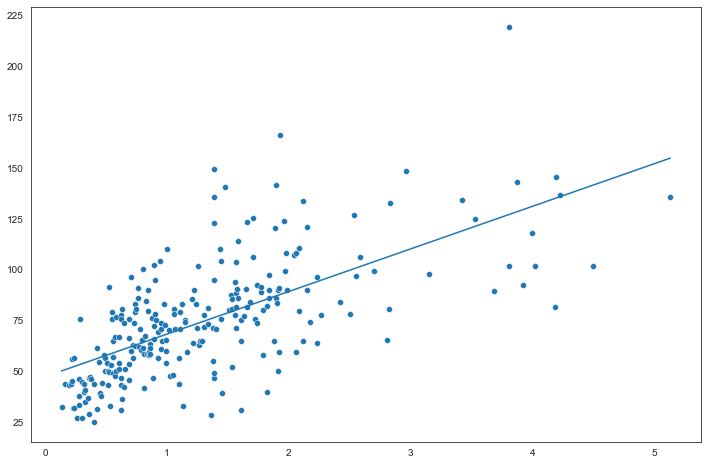

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [82]:
plot_linear_model_pair(df_jura, "vlCadmium", "vlZinc")

In [ ]:
grade_features.remove('descUnit')
grade_features

['vlCadmium', 'vlCobalt', 'vlChromium', 'vlNickel', 'vlLead', 'vlZinc']

In [ ]:
def linear_model_multiple (df, grade_features, y_elem):
  
  # Regressor
  reg = LinearRegression()
  
  grade_x = grade_features.copy()
  grade_x.remove(y_elem)

  xm = df[grade_x].values
  ym = df[y_elem].values

  reg.fit(X=xm, y=ym)
  score = reg.score(X=xm, y=ym)
  y_pred = reg.predict(xm)

  model_dict = {
    'model': reg,
    'element':y_elem,
    'score': score, 
    'pred': y_pred,
    'params': reg.get_params()
  }

  return model_dict

model = linear_model_multiple(df_jura, grade_features, 'vlNickel')
model

{'model': LinearRegression(),
 'element': 'vlNickel',
 'score': 0.7379665282676895,
 'pred': array([ 6.68413626,  7.16045423,  8.10315763,  8.35113888, 17.53168175,
         9.62014989,  6.51113883,  6.59962391, 10.73211176,  5.56934829,
         5.65545421,  6.65877691, 14.20365434, 19.81615526,  6.98652154,
         6.97595242,  7.01041014,  9.29597322,  6.69644477,  5.95625363,
         8.1708807 ,  7.6468843 , 12.06032749,  7.25054516, 15.24014418,
         8.15990672, 16.91517565,  7.67402964,  9.361945  , 13.10845346,
         8.54165114,  5.4933088 ,  9.27183828, 16.01637316, 15.93011308,
        17.34681799, 13.37890977, 10.37983782, 12.38689242,  8.14569711,
        22.26956457,  8.4619326 , 13.89180356, 17.56341374, 24.32281599,
        17.91138602, 12.01851752, 15.29106661, 19.23786586, 11.24897607,
        17.36500323, 13.92288978, 21.01292095, 12.16637871, 17.48280995,
        11.75615758, 12.5192524 , 23.61603592,  8.38649946, 15.05051891,
        21.91384081,  8.25728838